# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
#Brian Remite - WeatherPy Homework - Repo Edition
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint 
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Run code limited to testing range (10 cities, North America only) Skip cell if running full data pull

In [ ]:
# Range of latitudes and longitudes (testing list)
lat_range_short = (19.50139, 64.85694)
lng_range_short = (-161.75583, -68.01197)

# Create a testing list that will hold latitudes and longitudes (testing list, NA only)
lat_lngs_short = []

# Create a testing list that will hold, city names (testing list, NA only)
cities_short = []

# Create a set of random lat and lng combinations (testing list, NA only)
lats_short = np.random.uniform(low=19.50139, high=64.85694, size=11)
lngs_short = np.random.uniform(low=-161.75583, high=-68.01197, size=11)
lat_lngs_short = zip(lats_short, lngs_short)

# For loop will identify the nearest city for each latitude and longitude (testing)
# with citipy

for lat_lng_short in lat_lngs_short:
    city = citipy.nearest_city(lat_lng_short[0], lat_lng_short[1]).city_name
    
    # append unique city names to city list
    if city not in cities_short:
        cities_short.append(city)
        
#Display list of cities for testing purposes
#cities_short

#Declare url and variables needed for API calls
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
url = f"{base_url}appid={weather_api_key}&units={units}&q="

#Verify URL format
#print(url)

date = []
country = []
city_name = []
lat = []
lng = []
max_temp = []
humidity = []
wind = []
clouds = []

#Make API Calls to get city weather data (test list)
x = 1

for city in cities_short:
    city = city
    query_url = url + city
    response = requests.get(query_url).json()
    #print(query_url)  #Check query_url for functionality
    
    try:
        date.append(response["dt"])
        country.append(response["sys"]["country"])
        city_name.append(response["name"])
        lat.append(response["coord"]["lat"])  
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]['temp_max'])
        humidity.append(response["main"]['humidity'])
        wind.append(response["wind"]["speed"])
        clouds.append(response["clouds"]["all"])
        print(f"City {x} data extracted successfully.")  #Verify data extract worked.
        x+=1
    except (KeyError):
        print(f"City {x} name not found.")  #Inform user a city didn't extract properly.
        x+=1

#Take API data and place into DataFrame
city_df = pd.DataFrame({
                        "Date":date,
                        "Country":country,
                        "City":city_name,
                        "Lat":lat,
                        "Lng":lng,
                        "Max Temp":max_temp, 
                        "Humidity":humidity,
                        "Wind Speed":wind,
                        "Cloud Cover":clouds
                                         })
city_df = city_df.rename_axis('City ID')

#Display DF
city_df

# Run Code on Full List (Skip this section when running tests)

## Generate Cities List

In [2]:
# Range of latitudes and longitudes (full list)
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

In [4]:
#Display list of cities for testing purposes
#cities

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
#Declare url and variables needed for API calls
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
url = f"{base_url}appid={weather_api_key}&units={units}&q="

#Verify URL format
#print(url)

date = []
country = []
city_name = []
lat = []
lng = []
max_temp = []
humidity = []
wind = []
clouds = []
x = 1

In [7]:
#Make API Calls to get city weather data 
x = 1

for city in cities:
    city = city
    query_url = url + city
    response = requests.get(query_url).json()
    #print(query_url)  #Check query_url for functionality
    
    try:
        date.append(response["dt"])
        country.append(response["sys"]["country"])
        city_name.append(response["name"])
        lat.append(response["coord"]["lat"])  
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]['temp_max'])
        humidity.append(response["main"]['humidity'])
        wind.append(response["wind"]["speed"])
        clouds.append(response["clouds"]["all"])
        print(f"City {x} data extracted successfully.")  #Verify data extract worked.
        x+=1
    except (KeyError):
        print(f"City {x} name not found.")  #Inform user a city didn't extract properly.
        x+=1

City 1 data extracted successfully.
City 2 data extracted successfully.
City 3 data extracted successfully.
City 4 data extracted successfully.
City 5 data extracted successfully.
City 6 data extracted successfully.
City 7 data extracted successfully.
City 8 data extracted successfully.
City 9 data extracted successfully.
City 10 data extracted successfully.
City 11 data extracted successfully.
City 12 data extracted successfully.
City 13 data extracted successfully.
City 14 data extracted successfully.
City 15 data extracted successfully.
City 16 data extracted successfully.
City 17 name not found.
City 18 data extracted successfully.
City 19 data extracted successfully.
City 20 data extracted successfully.
City 21 data extracted successfully.
City 22 data extracted successfully.
City 23 data extracted successfully.
City 24 data extracted successfully.
City 25 data extracted successfully.
City 26 data extracted successfully.
City 27 data extracted successfully.
City 28 data extracted 

City 227 data extracted successfully.
City 228 data extracted successfully.
City 229 data extracted successfully.
City 230 data extracted successfully.
City 231 data extracted successfully.
City 232 data extracted successfully.
City 233 data extracted successfully.
City 234 data extracted successfully.
City 235 data extracted successfully.
City 236 data extracted successfully.
City 237 data extracted successfully.
City 238 data extracted successfully.
City 239 data extracted successfully.
City 240 data extracted successfully.
City 241 name not found.
City 242 data extracted successfully.
City 243 data extracted successfully.
City 244 data extracted successfully.
City 245 data extracted successfully.
City 246 data extracted successfully.
City 247 name not found.
City 248 name not found.
City 249 name not found.
City 250 data extracted successfully.
City 251 data extracted successfully.
City 252 data extracted successfully.
City 253 data extracted successfully.
City 254 data extracted su

City 451 data extracted successfully.
City 452 data extracted successfully.
City 453 data extracted successfully.
City 454 data extracted successfully.
City 455 data extracted successfully.
City 456 data extracted successfully.
City 457 data extracted successfully.
City 458 data extracted successfully.
City 459 data extracted successfully.
City 460 data extracted successfully.
City 461 data extracted successfully.
City 462 data extracted successfully.
City 463 data extracted successfully.
City 464 name not found.
City 465 data extracted successfully.
City 466 data extracted successfully.
City 467 data extracted successfully.
City 468 data extracted successfully.
City 469 data extracted successfully.
City 470 data extracted successfully.
City 471 data extracted successfully.
City 472 data extracted successfully.
City 473 data extracted successfully.
City 474 data extracted successfully.
City 475 data extracted successfully.
City 476 data extracted successfully.
City 477 data extracted s

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
#Take API data and place into DataFrame
city_df = pd.DataFrame({
                        "Date":date,
                        "Country":country,
                        "City":city_name,
                        "Lat":lat,
                        "Lng":lng,
                        "Max Temp":max_temp, 
                        "Humidity":humidity,
                        "Wind Speed":wind,
                        "Cloud Cover":clouds
                                         })
city_df = city_df.rename_axis('City ID')

In [9]:
#output City DF to look at results
city_df.head()

,Date,Country,City,Lat,Lng,Max Temp,Humidity,Wind Speed,Cloud Cover
City ID,,,,,,,,,
0,1586439965,US,Hilo,19.73,-155.09,71.60,78,5.06,1
1,1586440113,CA,Aklavik,68.22,-135.01,-2.20,84,3.36,75
2,1586439966,ZA,Cape Town,-33.93,18.42,82.40,14,11.41,100
3,1586440113,CV,São Filipe,14.90,-24.50,80.08,53,14.81,0
4,1586440113,LY,Benghazi,32.12,20.07,61.05,53,13.38,0


# Rest of code is agnostic to test or full list

### Convert Date data to legible dates

In [10]:
#Converting Date and time 
y = 0

for y in range(0,len(city_df)):
    timestamp = city_df["Date"][y]
    converted_timestamp = datetime.utcfromtimestamp(timestamp)
    shortened_timestamp = datetime.date(converted_timestamp)
    city_df["Date"][y] = converted_timestamp
    y+=1

city_df.head()

C:\ProgramData\Anaconda3\envs\PythonData2020_1\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Date,Country,City,Lat,Lng,Max Temp,Humidity,Wind Speed,Cloud Cover
City ID,,,,,,,,,
0,2020-04-09 13:46:05,US,Hilo,19.73,-155.09,71.60,78,5.06,1
1,2020-04-09 13:48:33,CA,Aklavik,68.22,-135.01,-2.20,84,3.36,75
2,2020-04-09 13:46:06,ZA,Cape Town,-33.93,18.42,82.40,14,11.41,100
3,2020-04-09 13:48:33,CV,São Filipe,14.90,-24.50,80.08,53,14.81,0
4,2020-04-09 13:48:33,LY,Benghazi,32.12,20.07,61.05,53,13.38,0


In [16]:
#Drop duplicate cities from data frame
city_df.drop_duplicates(subset=None, keep='first', inplace=True)

In [17]:
#Exporting data to csv file (will be used for vacation challenge as well)
city_df.to_csv("city_data.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

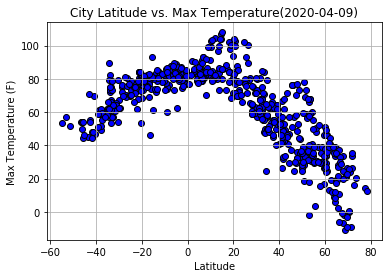

In [18]:
plt.scatter(city_df["Lat"], city_df["Max Temp"], marker = "o", color = "blue",edgecolor = "black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs. Max Temperature({shortened_timestamp})")
plt.savefig("Lat_vs_Temp_Plot")
plt.show()

#### Latitude vs. Humidity Plot

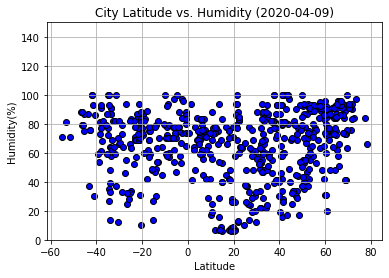

In [19]:
plt.scatter(city_df["Lat"], city_df["Humidity"], marker = "o", color = "blue",edgecolor = "black")
plt.grid()
plt.ylim(0, city_df["Humidity"].max()+50)
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.title(f"City Latitude vs. Humidity ({shortened_timestamp})")
plt.savefig("Lat_vs_Humidity_Plot")
plt.show()

#### Latitude vs. Cloudiness Plot

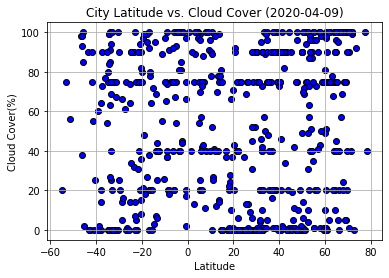

In [41]:
plt.scatter(city_df["Lat"], city_df["Cloud Cover"], marker = "o", color = "blue",edgecolor = "black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloud Cover(%)")
plt.title(f"City Latitude vs. Cloud Cover ({shortened_timestamp})")
plt.savefig("Lat_vs_Cloudiness_Plot")
plt.show()

#### Latitude vs. Wind Speed Plot

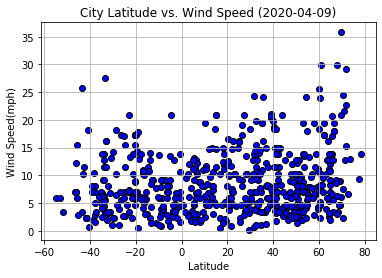

In [21]:
plt.scatter(city_df["Lat"], city_df["Wind Speed"], marker = "o", color = "blue",edgecolor = "black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.title(f"City Latitude vs. Wind Speed ({shortened_timestamp})")
plt.savefig("Lat_vs_WindSpeed_Plot")
plt.show()

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots
def linfun(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(0,0),fontsize=15,color="red")
    plt.show()
    print(f"Regression line equation is: {line_eq}")

In [22]:
# Create Northern and Southern Hemisphere DataFrames
north_df = city_df.loc[pd.to_numeric(city_df["Lat"]).astype(float) > 0, :]
south_df = city_df.loc[pd.to_numeric(city_df["Lat"]).astype(float) < 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = -1.13x + 99.38
The r-squared is: -0.8666350068052104
The regression displays a negative correlation.
In the northern hemisphere, as you move away from the equator the temperature decreases.


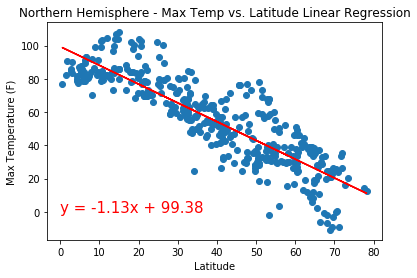

In [26]:
x_values = pd.to_numeric(north_df['Lat']).astype(float)
y_values = pd.to_numeric(north_df['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
print(f"The r-squared is: {rvalue}")
print("The regression displays a negative correlation.")
print("In the northern hemisphere, as you move away from the equator the temperature decreases.")

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,0),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.savefig("Lat_vs_Temp_Plot_North")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = 0.66x + 86.96
The r-squared is: 0.7453791328891161
The regression displays a positive correlation.
In the southern hemisphere, as you move closer to the equator the temperature increases.


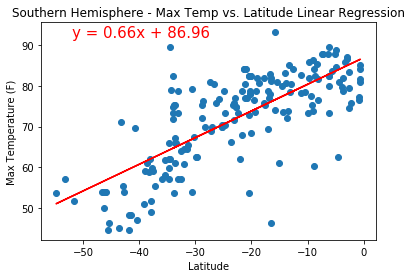

In [30]:
x_values = pd.to_numeric(south_df['Lat']).astype(float)
y_values = pd.to_numeric(south_df['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
print(f"The r-squared is: {rvalue}")
print("The regression displays a positive correlation.")
print("In the southern hemisphere, as you move closer to the equator the temperature increases.")

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-52,92),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.savefig("Lat_vs_Temp_Plot_South")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.38x + 49.66
The r-squared is: 0.31098398369855035
The regression does not display a solid correlation.


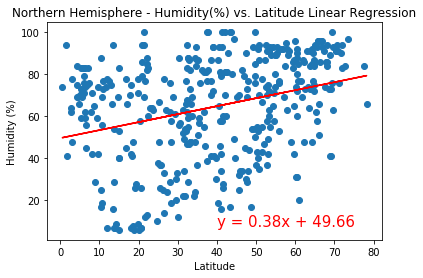

In [38]:
x_values = pd.to_numeric(north_df['Lat']).astype(float)
y_values = pd.to_numeric(north_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
print(f"The r-squared is: {rvalue}")
print("The regression does not display a solid correlation.")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity(%) vs. Latitude Linear Regression')
plt.savefig("Lat_vs_Humidity_Plot_North")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.0x + 69.21
The r-squared is: 9.925406002416712e-05
The regression does not display a solid correlation.


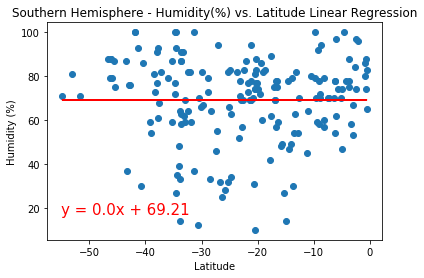

In [55]:
x_values = pd.to_numeric(south_df['Lat']).astype(float)
y_values = pd.to_numeric(south_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
print(f"The r-squared is: {rvalue}")
print("The regression does not display a solid correlation.")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,17),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Humidity(%) vs. Latitude Linear Regression')
plt.savefig("Lat_vs_Humidity_Plot_South")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.18x + 43.03
The r-squared is: 0.09567682294562435
The regression does not display much of a correlation between the data sets.


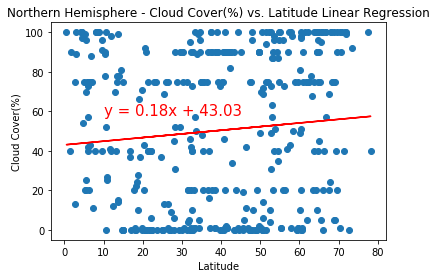

In [45]:
x_values = pd.to_numeric(north_df['Lat']).astype(float)
y_values = pd.to_numeric(north_df['Cloud Cover']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.title('Northern Hemisphere - Cloud Cover(%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,58),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloud Cover(%)')
plt.title('Northern Hemisphere - Cloud Cover(%) vs. Latitude Linear Regression')
plt.savefig("Lat_vs_Cloudiness_Plot_North")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.29x + 59.71
The r-squared is: 0.10776036568986232
The regression does not display much of a correlation between the data sets.


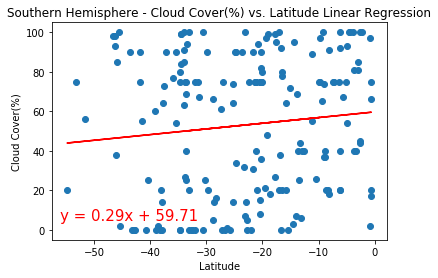

In [48]:
x_values = pd.to_numeric(south_df['Lat']).astype(float)
y_values = pd.to_numeric(south_df['Cloud Cover']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.title('Northern Hemisphere - Cloud Cover(%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-56,5),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloud Cover(%)')
plt.title('Southern Hemisphere - Cloud Cover(%) vs. Latitude Linear Regression')
plt.savefig("Lat_vs_Cloudiness_Plot_South")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = 0.05x + 7.14
The r-squared is: 0.17314841729867927
The regression does not display much of a correlation between the data sets.


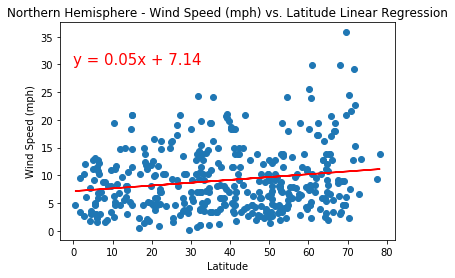

In [50]:
x_values = pd.to_numeric(north_df['Lat']).astype(float)
y_values = pd.to_numeric(north_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.savefig("Lat_vs_WindSpeed_Plot_North")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = -0.02x + 7.13
The r-squared is: -0.06075362396274236
The regression does not display much of a correlation between the data sets.


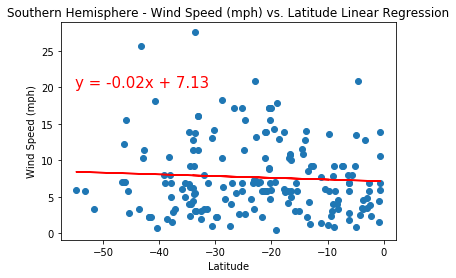

In [52]:
x_values = pd.to_numeric(south_df['Lat']).astype(float)
y_values = pd.to_numeric(south_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.savefig("Lat_vs_WindSpeed_Plot_South")
plt.show()